In [1]:
import pandas as pd

# Reset to default display options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("data.csv")
df.columns

Index(['id', 'object', 'result_position', 'annonce_id', 'agency_id',
       'agency_page', 'agency_contact_name', 'agency_img_url',
       'agency_phone_number', 'agency_has_email', 'agency_link', 'address',
       'area', 'bedrooms_count', 'business_unit', 'coownership_annual_charges',
       'coownership_number_of_lots', 'coownership_is_syndic_procedure',
       'contact_is_private_seller', 'contact_email', 'description', 'district',
       'dpe', 'estate_type', 'electricity_consumption', 'estate_type_id',
       'features', 'ges', 'gas_emissions', 'highlighting_level', 'insee_code',
       'is_exclusive', 'is_redirected', 'is_expired', 'latitude', 'longitude',
       'monthly_price', 'main_picture', 'nature', 'postal_code', 'position',
       'picture_count', 'price', 'price_per_meter', 'photos',
       'price_decrease_percent', 'publication_id', 'pricing_price_note', 'ref',
       'rooms', 'short_description', 'transaction_type', 'title', 'tags',
       'url', 'video_url', 'virtual

In [2]:
data = df[["address", "area", "rooms", "bedrooms_count","monthly_price", "price", "price_per_meter", "district", "estate_type"]]
data

,address,area,rooms,bedrooms_count,monthly_price,price,price_per_meter,district,estate_type
0,Bordeaux,26.000825,1,0.0,996,189000,7269.0,Le Lac-Bacalan,Studio
1,Bordeaux,60.000000,3,0.0,2199,420000,7000.0,Le Lac-Bacalan,Appartement neuf
2,Bordeaux,83.591331,4,3.0,1980,378000,4522.0,La Bastide,Appartement neuf
3,Bordeaux,103.746828,4,2.0,3631,695000,6699.0,Le Lac-Bacalan,Appartement neuf
4,Bordeaux,124.453160,5,4.0,4308,825000,6629.0,Le Lac-Bacalan,Appartement neuf
...,...,...,...,...,...,...,...,...,...
913,Bordeaux,77.999578,4,0.0,2057,369250,4734.0,Le Lac-Bacalan,Appartement
914,Bordeaux,155.178046,6,0.0,5274,950000,6122.0,Grand Parc-Chartrons-Paul Doumer,Appartement
915,Bordeaux,NaN,3,0.0,1314,235000,NaN,Saint Jean-Belcier-Carle Vernet-Albert 1er,Appartement
916,Bordeaux,215.443107,15,0.0,13194,2380000,11047.0,Le Lac-Bacalan,Appartement


In [3]:
df["district"].value_counts()

Hôtel de Ville-Quinconce-Saint Seurin-Fondaudège    148
Le Lac-Bacalan                                      142
La Bastide                                          112
Caudéran-Barrière Judaïque                          111
Saint Jean-Belcier-Carle Vernet-Albert 1er           96
Grand Parc-Chartrons-Paul Doumer                     75
Saint Bruno-Saint Augustin                           63
Capucins-Saint Michel-Nansouty-Saint Genès           60
La Glacière-Labatut                                   1
Name: district, dtype: int64

In [4]:
district = df[df["district"].isin([
    "Hôtel de Ville-Quinconce-Saint Seurin-Fondaudège",
    "Le Lac-Bacalan",
    "La Bastide",
    "Caudéran-Barrière Judaïque",
    "Saint Jean-Belcier-Carle Vernet-Albert 1er",
    "Grand Parc-Chartrons-Paul Doumer ",
    "Saint Bruno-Saint Augustin",
    "Capucins-Saint Michel-Nansouty-Saint Genès"
])]
district = df["district"][df["district"] != "La Glacière-Labatut"]
district = pd.get_dummies(district)
len(district)

917

In [5]:
df["estate_type"].value_counts()

Appartement               380
Maison/Villa              241
Appartement neuf          177
Studio                     59
Duplex                     11
Appartement en viager       9
Maison/Villa en viager      6
Maison ancienne             5
Maison en pierre            5
Échoppe                     4
Maison de ville             3
Maison/Villa neuve          3
Maison contemporaine        3
Propriété                   2
Maison d'architecte         2
Villa                       2
Studio en viager            1
Propriété en viager         1
Exploitation viticole       1
Projet de construction      1
Triplex                     1
Manoir                      1
Name: estate_type, dtype: int64

In [6]:
estate_type = df[df["estate_type"].isin(["Appartement", "Maison/Villa", "Appartement neuf", "Studio"])]
estate_type = df["estate_type"][
    (df["estate_type"] == "Appartement") |
    (df["estate_type"] == "Maison/Villa") |
    (df["estate_type"] == "Appartement neuf") |
    (df["estate_type"] == "Studio")
]

In [7]:
estate_type = pd.get_dummies(estate_type)
estate_type

,Appartement,Appartement neuf,Maison/Villa,Studio
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
913,1,0,0,0
914,1,0,0,0
915,1,0,0,0
916,1,0,0,0


In [8]:
data

,address,area,rooms,bedrooms_count,monthly_price,price,price_per_meter,district,estate_type
0,Bordeaux,26.000825,1,0.0,996,189000,7269.0,Le Lac-Bacalan,Studio
1,Bordeaux,60.000000,3,0.0,2199,420000,7000.0,Le Lac-Bacalan,Appartement neuf
2,Bordeaux,83.591331,4,3.0,1980,378000,4522.0,La Bastide,Appartement neuf
3,Bordeaux,103.746828,4,2.0,3631,695000,6699.0,Le Lac-Bacalan,Appartement neuf
4,Bordeaux,124.453160,5,4.0,4308,825000,6629.0,Le Lac-Bacalan,Appartement neuf
...,...,...,...,...,...,...,...,...,...
913,Bordeaux,77.999578,4,0.0,2057,369250,4734.0,Le Lac-Bacalan,Appartement
914,Bordeaux,155.178046,6,0.0,5274,950000,6122.0,Grand Parc-Chartrons-Paul Doumer,Appartement
915,Bordeaux,NaN,3,0.0,1314,235000,NaN,Saint Jean-Belcier-Carle Vernet-Albert 1er,Appartement
916,Bordeaux,215.443107,15,0.0,13194,2380000,11047.0,Le Lac-Bacalan,Appartement


In [9]:
result = pd.concat([data, district, estate_type], axis=1)
result

,address,area,rooms,bedrooms_count,monthly_price,price,price_per_meter,district,estate_type,Capucins-Saint Michel-Nansouty-Saint Genès,...,Grand Parc-Chartrons-Paul Doumer,Hôtel de Ville-Quinconce-Saint Seurin-Fondaudège,La Bastide,Le Lac-Bacalan,Saint Bruno-Saint Augustin,Saint Jean-Belcier-Carle Vernet-Albert 1er,Appartement,Appartement neuf,Maison/Villa,Studio
0,Bordeaux,26.000825,1,0.0,996,189000,7269.0,Le Lac-Bacalan,Studio,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Bordeaux,60.000000,3,0.0,2199,420000,7000.0,Le Lac-Bacalan,Appartement neuf,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Bordeaux,83.591331,4,3.0,1980,378000,4522.0,La Bastide,Appartement neuf,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Bordeaux,103.746828,4,2.0,3631,695000,6699.0,Le Lac-Bacalan,Appartement neuf,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Bordeaux,124.453160,5,4.0,4308,825000,6629.0,Le Lac-Bacalan,Appartement neuf,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,Bordeaux,77.999578,4,0.0,2057,369250,4734.0,Le Lac-Bacalan,Appartement,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
914,Bordeaux,155.178046,6,0.0,5274,950000,6122.0,Grand Parc-Chartrons-Paul Doumer,Appartement,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
915,Bordeaux,NaN,3,0.0,1314,235000,NaN,Saint Jean-Belcier-Carle Vernet-Albert 1er,Appartement,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
916,Bordeaux,215.443107,15,0.0,13194,2380000,11047.0,Le Lac-Bacalan,Appartement,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
result = result.drop(["address"], axis=1)
result

,area,rooms,bedrooms_count,monthly_price,price,price_per_meter,district,estate_type,Capucins-Saint Michel-Nansouty-Saint Genès,Caudéran-Barrière Judaïque,Grand Parc-Chartrons-Paul Doumer,Hôtel de Ville-Quinconce-Saint Seurin-Fondaudège,La Bastide,Le Lac-Bacalan,Saint Bruno-Saint Augustin,Saint Jean-Belcier-Carle Vernet-Albert 1er,Appartement,Appartement neuf,Maison/Villa,Studio
0,26.000825,1,0.0,996,189000,7269.0,Le Lac-Bacalan,Studio,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,60.000000,3,0.0,2199,420000,7000.0,Le Lac-Bacalan,Appartement neuf,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,83.591331,4,3.0,1980,378000,4522.0,La Bastide,Appartement neuf,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,103.746828,4,2.0,3631,695000,6699.0,Le Lac-Bacalan,Appartement neuf,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,124.453160,5,4.0,4308,825000,6629.0,Le Lac-Bacalan,Appartement neuf,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,77.999578,4,0.0,2057,369250,4734.0,Le Lac-Bacalan,Appartement,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
914,155.178046,6,0.0,5274,950000,6122.0,Grand Parc-Chartrons-Paul Doumer,Appartement,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
915,NaN,3,0.0,1314,235000,NaN,Saint Jean-Belcier-Carle Vernet-Albert 1er,Appartement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
916,215.443107,15,0.0,13194,2380000,11047.0,Le Lac-Bacalan,Appartement,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
result.columns

Index(['area', 'rooms', 'bedrooms_count', 'monthly_price', 'price',
       'price_per_meter', 'district', 'estate_type',
       'Capucins-Saint Michel-Nansouty-Saint Genès',
       'Caudéran-Barrière Judaïque', 'Grand Parc-Chartrons-Paul Doumer',
       'Hôtel de Ville-Quinconce-Saint Seurin-Fondaudège', 'La Bastide',
       'Le Lac-Bacalan', 'Saint Bruno-Saint Augustin',
       'Saint Jean-Belcier-Carle Vernet-Albert 1er', 'Appartement',
       'Appartement neuf', 'Maison/Villa', 'Studio'],
      dtype='object')

In [12]:
result = result.dropna()
result

,area,rooms,bedrooms_count,monthly_price,price,price_per_meter,district,estate_type,Capucins-Saint Michel-Nansouty-Saint Genès,Caudéran-Barrière Judaïque,Grand Parc-Chartrons-Paul Doumer,Hôtel de Ville-Quinconce-Saint Seurin-Fondaudège,La Bastide,Le Lac-Bacalan,Saint Bruno-Saint Augustin,Saint Jean-Belcier-Carle Vernet-Albert 1er,Appartement,Appartement neuf,Maison/Villa,Studio
0,26.000825,1,0.0,996,189000,7269.0,Le Lac-Bacalan,Studio,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,60.000000,3,0.0,2199,420000,7000.0,Le Lac-Bacalan,Appartement neuf,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,83.591331,4,3.0,1980,378000,4522.0,La Bastide,Appartement neuf,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,103.746828,4,2.0,3631,695000,6699.0,Le Lac-Bacalan,Appartement neuf,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,124.453160,5,4.0,4308,825000,6629.0,Le Lac-Bacalan,Appartement neuf,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,119.991609,4,0.0,3180,572000,4767.0,Le Lac-Bacalan,Maison/Villa,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
913,77.999578,4,0.0,2057,369250,4734.0,Le Lac-Bacalan,Appartement,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
914,155.178046,6,0.0,5274,950000,6122.0,Grand Parc-Chartrons-Paul Doumer,Appartement,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
916,215.443107,15,0.0,13194,2380000,11047.0,Le Lac-Bacalan,Appartement,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
result.corr()

/var/folders/gp/jmtpskbd4ybdtp0wjqmz_h540000gn/T/ipykernel_83703/76870456.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result.corr()


,area,rooms,bedrooms_count,monthly_price,price,price_per_meter,Capucins-Saint Michel-Nansouty-Saint Genès,Caudéran-Barrière Judaïque,Grand Parc-Chartrons-Paul Doumer,Hôtel de Ville-Quinconce-Saint Seurin-Fondaudège,La Bastide,Le Lac-Bacalan,Saint Bruno-Saint Augustin,Saint Jean-Belcier-Carle Vernet-Albert 1er,Appartement,Appartement neuf,Maison/Villa,Studio
area,1.000000,0.897401,0.073536,0.906854,0.906778,0.143464,0.041190,0.147196,0.099653,0.123258,-0.138773,-0.149289,0.020617,-0.118465,-0.269523,-0.195150,0.653763,-0.285024
rooms,0.897401,1.000000,0.137904,0.801311,0.802717,0.097969,0.043007,0.147708,0.072579,0.068241,-0.073849,-0.141828,-0.007748,-0.086094,-0.276272,-0.103199,0.638670,-0.395145
bedrooms_count,0.073536,0.137904,1.000000,-0.010249,-0.012600,-0.139288,0.162010,0.020701,0.025109,-0.073726,0.059259,-0.008841,-0.029457,-0.116254,0.088757,-0.110108,0.084114,-0.134034
monthly_price,0.906854,0.801311,-0.010249,1.000000,0.999719,0.480266,-0.000981,0.137045,0.091428,0.215989,-0.172417,-0.150464,0.031873,-0.149677,-0.220956,-0.221669,0.599399,-0.241962
price,0.906778,0.802717,-0.012600,0.999719,1.000000,0.481470,-0.004725,0.133221,0.087643,0.211185,-0.161575,-0.149043,0.028205,-0.143940,-0.233378,-0.200170,0.594070,-0.244019
price_per_meter,0.143464,0.097969,-0.139288,0.480266,0.481470,1.000000,-0.080842,-0.028736,0.047191,0.346648,-0.124292,-0.086649,0.005960,-0.135016,-0.048048,-0.073221,0.113984,0.015684
Capucins-Saint Michel-Nansouty-Saint Genès,0.041190,0.043007,0.162010,-0.000981,-0.004725,-0.080842,1.000000,-0.110923,-0.090027,-0.137240,-0.117861,-0.127066,-0.081884,-0.104434,0.102053,-0.154806,0.034015,-0.001757
Caudéran-Barrière Judaïque,0.147196,0.147708,0.020701,0.137045,0.133221,-0.028736,-0.110923,1.000000,-0.124291,-0.189473,-0.162719,-0.175426,-0.113049,-0.144181,-0.046611,-0.185816,0.231183,-0.004574
Grand Parc-Chartrons-Paul Doumer,0.099653,0.072579,0.025109,0.091428,0.087643,0.047191,-0.090027,-0.124291,1.000000,-0.153780,-0.132066,-0.142380,-0.091753,-0.117020,0.078147,-0.173462,0.098596,-0.036085
Hôtel de Ville-Quinconce-Saint Seurin-Fondaudège,0.123258,0.068241,-0.073726,0.215989,0.211185,0.346648,-0.137240,-0.189473,-0.153780,1.000000,-0.201325,-0.217047,-0.139870,-0.178389,0.161861,-0.240285,0.073660,-0.044826


In [ ]:
import seaborn as sns

pairplot = sns.pairplot(result)

<Axes: xlabel='area', ylabel='price_per_meter'>

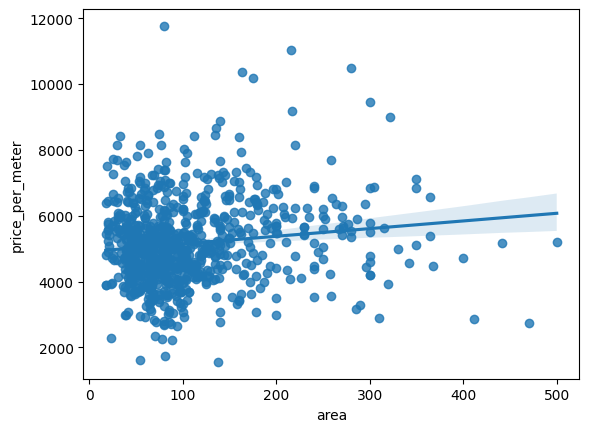

In [182]:
# X = result[['area', 'rooms', 'bedrooms_count', 'monthly_price', 'price', 'Capucins-Saint Michel-Nansouty-Saint Genès', 'Caudéran-Barrière Judaïque', 'Grand Parc-Chartrons-Paul Doumer', 'Hôtel de Ville-Quinconce-Saint Seurin-Fondaudège', 'La Bastide', 'Le Lac-Bacalan', 'Saint Bruno-Saint Augustin', 'Saint Jean-Belcier-Carle Vernet-Albert 1er', 'Appartement', 'Appartement neuf', 'Maison/Villa', 'Studio']]
X = result[['area', 'rooms', 'bedrooms_count', 'monthly_price', 'price']]
y = result["price_per_meter"]

sns.regplot(x=X['area'], y=y)

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_percentage_error

y_pred = reg.predict(X_test)

mean_absolute_percentage_error(y_pred, y_test)

0.1175302832894674

In [184]:
reg.coef_

array([-2.97056248e+01, -3.57257936e+01, -1.31783366e+01, -5.87058050e-01,
        9.23687252e-03])

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_absolute_percentage_error')
cv_scores *= -1

print(cv_scores)
print(cv_scores.mean())